In [7]:
import numpy as np

from qiskit import *
from qiskit.visualization import *


In [8]:
# number of qubits
n = 4
# iterations
r = 3

In [9]:
# --------- Initialization ---------
grovers = QuantumCircuit(n + 3, n)

# flip ancilla bit
grovers.x(n)

for i in range(n + 1):
    grovers.h(i)


grovers.barrier()


In [10]:
for i in range(r):
    for i in range(n):
        if i == 2 or i == 3:
            grovers.x(i)

    grovers.barrier()

    # Phase Inversion
    grovers.ccx(0, 1, 5)

    grovers.ccx(2, 5, 6)

    grovers.ccx(3, 6, 4)

    grovers.ccx(2, 5, 6)
    
    grovers.ccx(0, 1, 5)

    grovers.barrier()

    for i in range(n):
        if i == 2 or i == 3:
            grovers.x(i)

    grovers.barrier()

    for i in range(n):
        grovers.h(i)
        grovers.x(i)

    grovers.barrier()

# ------- inversion about the mean -------

    grovers.h(3)

    grovers.ccx(0,1, 5)

    grovers.ccx(2, 5, 3)

    grovers.ccx(0,1, 5)

    grovers.h(3)

    grovers.barrier()

    for i in range(n):
        grovers.x(i)
        grovers.h(i)

    grovers.barrier()

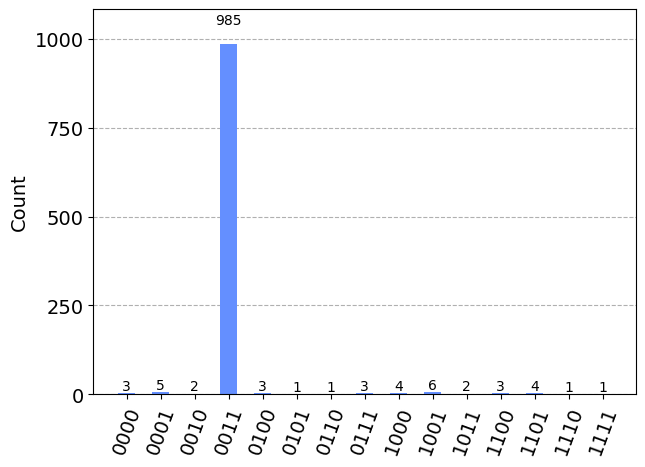

In [11]:
# --------- run simulation ---------
for i in range(n):
   grovers.measure(i, i)

quasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(grovers, quasm_sim )
result = quasm_sim.run(qobj).result()
answer = result.get_counts()
plot_histogram(answer)


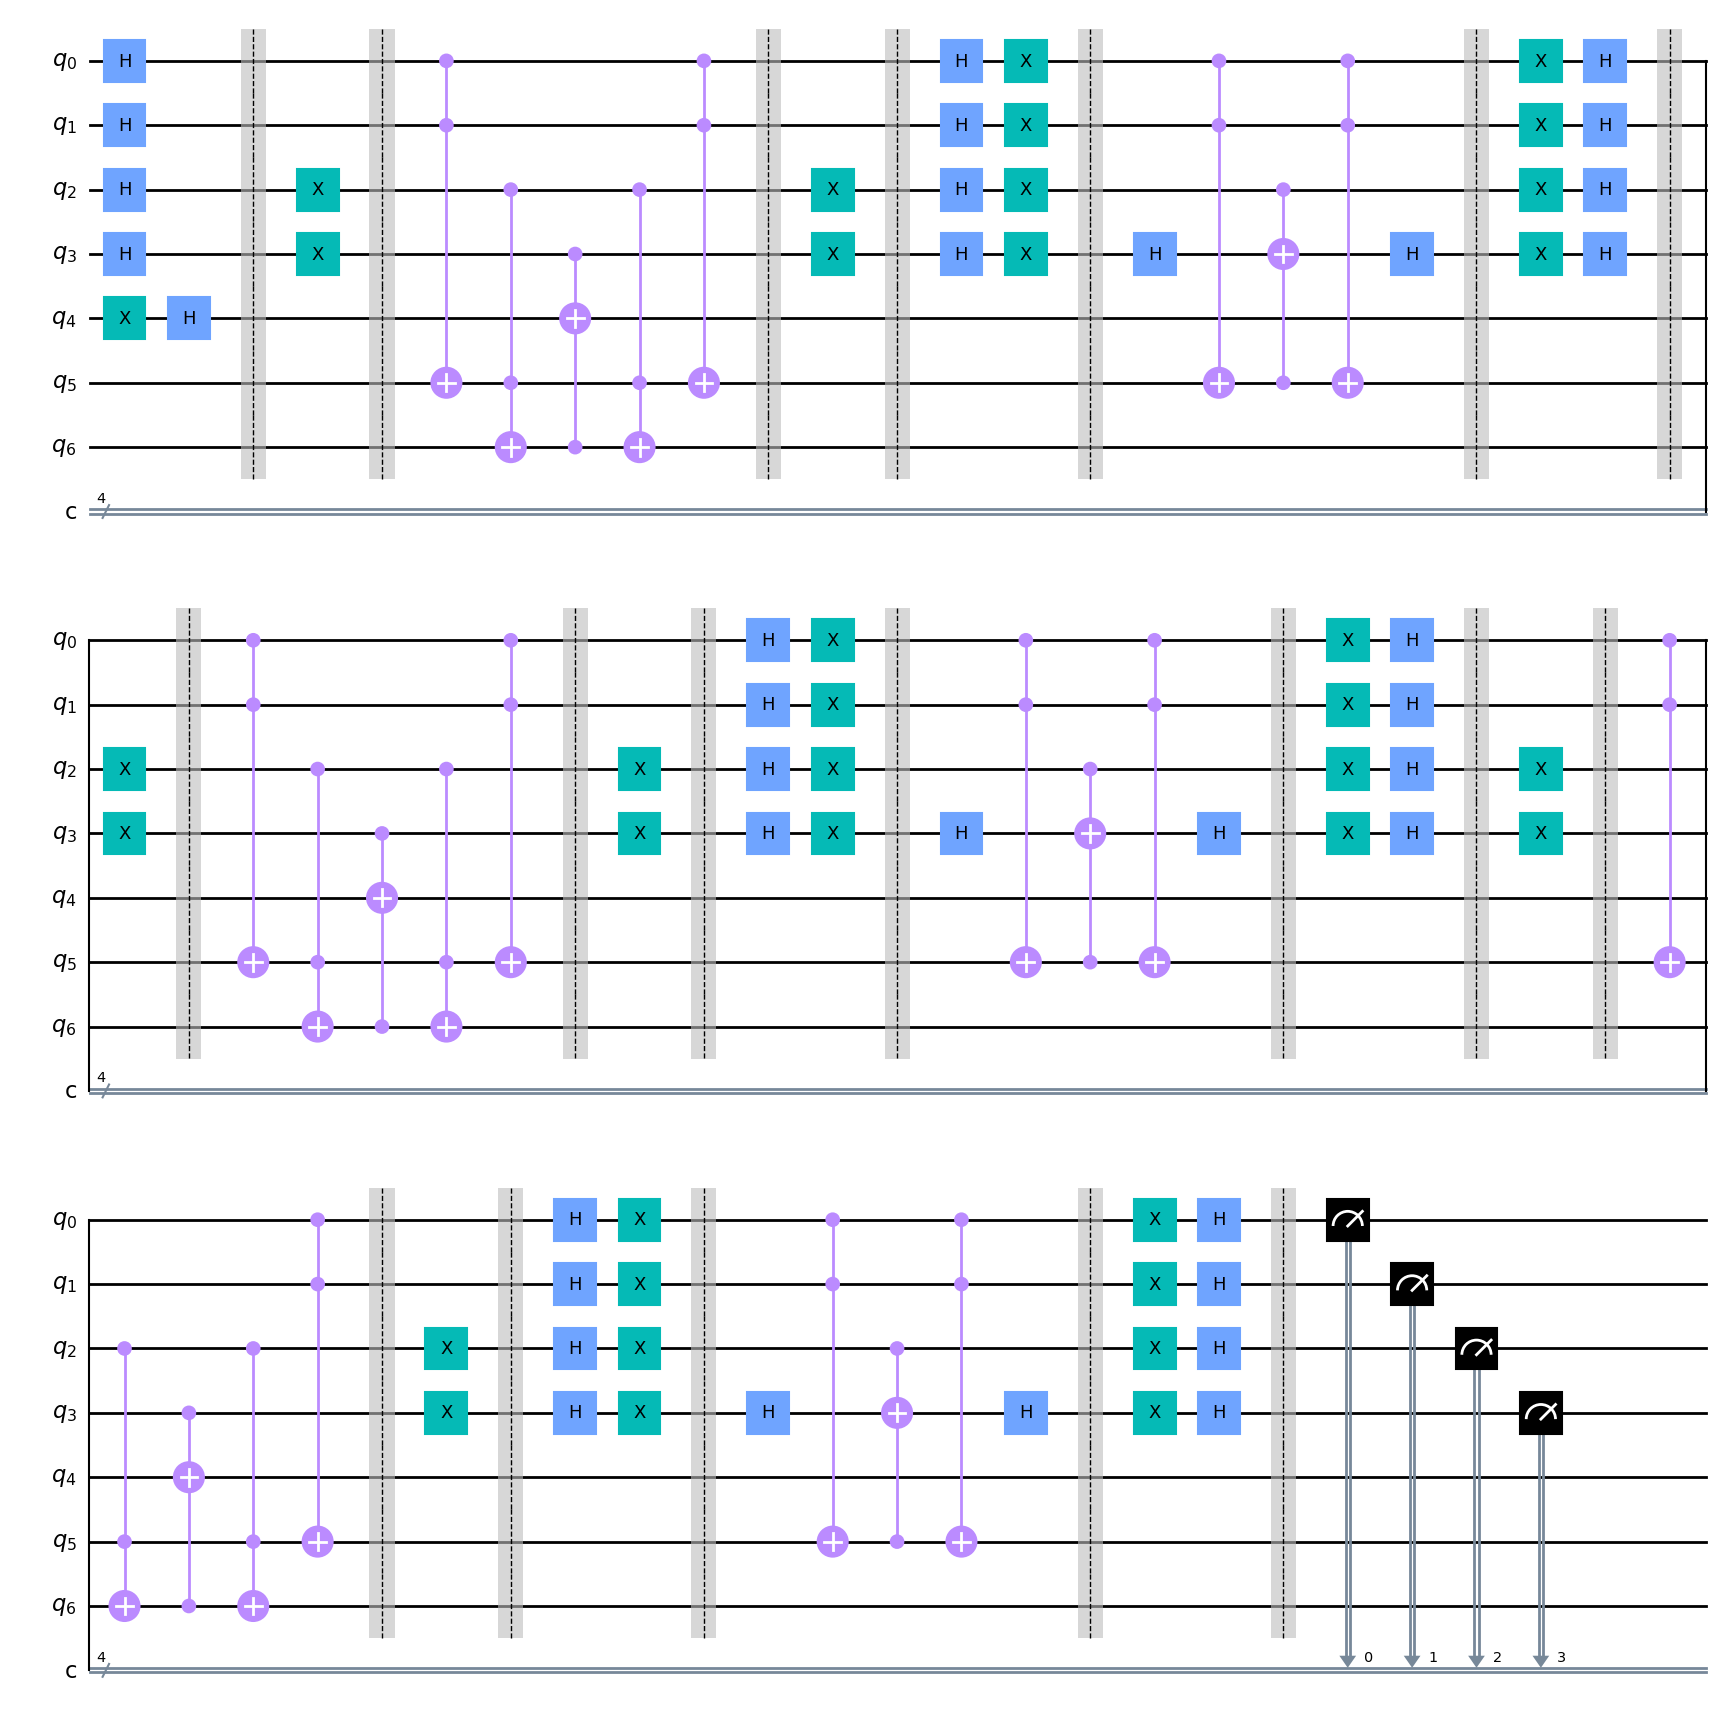

In [12]:
grovers.draw(output='mpl', filename="grovers_circuit.png")